# Self Study 4: Fixed Points and Stability

## Section 1: Linear Stability Analysis

In this section, you will create a Python function to analyze the fixed points and their stability.

In [1]:
# Import libraries
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Task 1: Function to Find Fixed Points

Write a Python function, `find_fixed_points`, that takes an ODE function and initial guesses for fixed points, and returns the calculated fixed points.

Use `fsolve` from `scipy.optimize` to find the fixed points based on your initial guesses. Note this will only find one fixed point at a time, so you will need to use multiple "initial guesses" to find all the fixed points.

In this first part we do it numerically. 

Later we will use a different method to find all the fixed points at once, with symbolic math (`sympy`).


In [2]:
def find_fixed_points(ode_func, initial_guesses):
    # your code here
    intermediate_points = fsolve(func=ode_func, x0=initial_guesses)
    fixed_points = set(intermediate_points)
    return fixed_points


### Task 2: Function for Linear Stability Analysis

Write another Python function, `linear_stability_analysis`, that takes an ODE function, its fixed points, and returns the stability type ("Stable" or "Unstable") of each fixed point.

**Hint**: Perturb the fixed point by a small value $\Delta$ and check the sign of the ODE.


In [3]:
def linear_stability_analysis(ode_func, fixed_points, delta=1e-3):
    # your code here
    t = np.linspace(0,50,101)
    stability = {}
    for point in fixed_points:
        perturbated_point = point+delta
        sol = odeint(func=ode_func, y0=perturbated_point, t=t)
        if sol[-1]-perturbated_point < 0:
            stability[point] = "Stable"
        elif sol[-1]-perturbated_point > 0:
            stability[point] = "Unstable"
        else:
            stability[point] = "Saddle"
    return stability

### Task 3: Combine Into `stability` Function

Combine `find_fixed_points` and `linear_stability_analysis` into a single function named `stability`. This function should take an ODE and initial guesses for fixed points, and print out each fixed point along with its stability type.


In [4]:
def stability(ode_func, initial_guesses, delta=1e-3):
    # Find fixed points
    # your code here
    fixed_points = find_fixed_points(ode_func=ode_func, initial_guesses=initial_guesses)
    
    # Analyze stability
    # your code here
    stabilities = linear_stability_analysis(ode_func=ode_func, fixed_points=fixed_points)
    
    # Print results
    # your code here
    for fixed_point, stability in stabilities.items():
        print(str(fixed_point) + ": " + str(stability))
    pass


### Task 4: Explore Various ODEs

### Example 1: Logistic Equation

Use the `stability` function to analyze the logistic equation:

$$
\frac{dN}{dt} = rN \left(1 - \frac{N}{K}\right)
$$

### Example 2: Exponential Growth

Use the `stability` function to analyze the exponential growth equation:

$$
\frac{dN}{dt} = rN
$$

### Example 3: A function of your choice


In [5]:
# Example 1: Logistic Equation
def logistic_eq(N, t=None):
    r = 0.1  # Growth rate
    K = 300  # Carrying capacity
    return r * N * (1 - N / K)

print("Logistic Equation Stability Analysis:")
stability(logistic_eq, initial_guesses=[0, 350])


Logistic Equation Stability Analysis:
0.0: Unstable
300.0: Stable


In [6]:
# Example 2: Exponential Growth
def exponential_growth(N, t=None):
    r = -0.1  # Growth rate
    return r * N

print("\nExponential Growth Stability Analysis:")
stability(exponential_growth, initial_guesses=[0, 10])


Exponential Growth Stability Analysis:
0.0: Stable


In [7]:
# Example 3: Transcritical bifurcation
def transcritical_bifurcation(N, t=None):
    r = 7
    return r * N - N**2

print("Transcritical Stability Analysis:")
stability(transcritical_bifurcation, initial_guesses=[0,10])

Transcritical Stability Analysis:
0.0: Unstable
7.0: Stable


## Section 2: A Labor Market Example



#### Background

The dynamics of the labor market can be modeled by the following system of equations:

The rate of change of wage ($ w $) is dependent on the difference between labor demand ($ l^d $) and labor supply ($ l^s $):

$$
\dot{w} = \beta (l^d - l^s)
$$
where $ \beta $ is a positive constant.

Labor demand decreases linearly with wage:
$$
l^d(w) = \mu - \gamma w
$$
where $\mu$ and $\gamma$ are positive constants.

Labor supply is a function of wage and is influenced by the "negative income effect":
   * As wages increase, income increases, leading to a greater demand for leisure and a decrease in labor supply after a certain point.

### Part 1: Setup

 **Labor Supply and Demand Functions**: Write a Python function `labor_supply(w, alpha, delta)` that models $ l^s(w) $ using a quadratic function.
   - The function should initially increase with $ w $ but should decrease after reaching a peak (i.e., a quadatic function `alpha * x - delta * x**2`).
   
Labour demand decreases linearly with wage: $ l^d(w) = \mu - \gamma w $ where $ \mu $ and $ \gamma $ are positive constants.

In [8]:
def labor_supply(w, alpha, delta):
    # Your code here
    l_s = alpha * w - delta * w**2
    return l_s

def labor_demand(w, mu, gamma):
    # Your code here
    l_d = mu - gamma * w
    return l_d

**Wage Dynamics**: Write a Python function `wage_dynamics(w, beta, mu, gamma, alpha, delta)` that returns $ \dot{w} $ based on the given $ w $ and parameters.

$$l^d = \mu - \gamma \cdot w$$
$$l^s = \alpha \cdot w - \delta \cdot w^2$$
$$\frac{dw}{dt} = \beta \cdot (l^d - l^s) = \beta \cdot (\mu - \gamma \cdot w - \alpha \cdot w + \delta \cdot w^2)$$
$$\frac{dw}{dt} = \beta (w^2 \cdot \delta - w \cdot (\gamma + \alpha) + \mu)$$

In [23]:
def wage_dynamics(w,beta, mu, gamma, alpha, delta):
    ld = labor_demand(w, mu, gamma)
    ls = labor_supply(w, alpha, delta)
    return beta * (ld-ls) 


In [27]:
# Define parameters for the example
beta = 1
mu = 130
gamma = 1.6
alpha = 5
delta = 0.07

**Visualization**: Plot $ \dot{w} $ as a function of $ w $ for different sets of parameters $ \beta, \mu, \gamma, \alpha, \delta $. **Hint**: use `ipywidgets` interact

In [42]:
from ipywidgets import interact

w = np.linspace(0, 100, 100)
@interact(beta=(0.1,5,0.1), mu=(0.1,200,0.1), gamma=(0.1,5,0.1), alpha=(0.1,5,0.1), delta=(0.01,1,0.01))
def plot_wage_dynamics(beta=1, mu=130, gamma=1.6, alpha=5, delta=0.07):
    # Your code here
    plt.figure(figsize=(6,4))
    plt.plot(w,wage_dynamics(w,beta,mu,gamma,alpha,delta), label='dW')
    plt.plot(w,labor_demand(w,mu,gamma), label='Labor Demand')
    plt.plot(w,labor_supply(w,alpha,delta), label='Labor Supply')
    plt.xlabel("Wage (w)")
    plt.ylabel("Wage growth (dW)")
    plt.legend()
    plt.grid(True)
    plt.show()
    # pass

interactive(children=(FloatSlider(value=1.0, description='beta', max=5.0, min=0.1), FloatSlider(value=130.0, d…

For the above parameters we have a stable fixed point for the first intersection $l^s_1=l^d_1$ and an unstable solution in the second intersection $l^s_2 = l^d_2$

From the graph, we can see that:

- When $ \dot{w} > 0 $, the wage $ w $ is increasing over time.
- When $ \dot{w} < 0 $, the wage $ w $ is decreasing over time.

### Section 3: Fixed Points and Stability (Labour Market)

Solve the system of equations to find the fixed points, either analytically or using `sympy` (see [sympy documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html#system-of-nonlinear-equations)).


$$
\dot{w} = \beta (l^d - l^s) = \beta (\mu - \gamma w - (\alpha w - \delta w^2))
$$

Writing down the $l^d$ and $l^s$ expressions again:
$$l^d = \mu - \gamma \cdot w$$
$$l^s = \alpha \cdot w - \delta \cdot w^2$$

To find the equilibrium points, we need to solve $ \dot{w} = 0 $. To do so, this time we will use `sympy` to solve the system of equations. Read the [sympy documentation](https://docs.sympy.org/latest/modules/solvers/solvers.html#system-of-nonlinear-equations) to learn how to use `sympy` to solve a system of nonlinear equations.

In [43]:
from sympy import symbols, solve

# Define variables and parameters
# Choosing parameters that made the graph above look somewhat nice
beta = 1
mu = 130
gamma = 1.6
alpha = 5
delta = 0.07
w = symbols('w')
# Define the equation for equilibrium
eq = beta * (mu - gamma*w-(alpha*w - delta * w**2))
# Solve for equilibrium wage
solve(eq, w)

[28.0298740567719, 66.2558402289424]

Use starting cod below to find the fixed points of the system of equations and plot the wage dynamics for different sets of parameters.

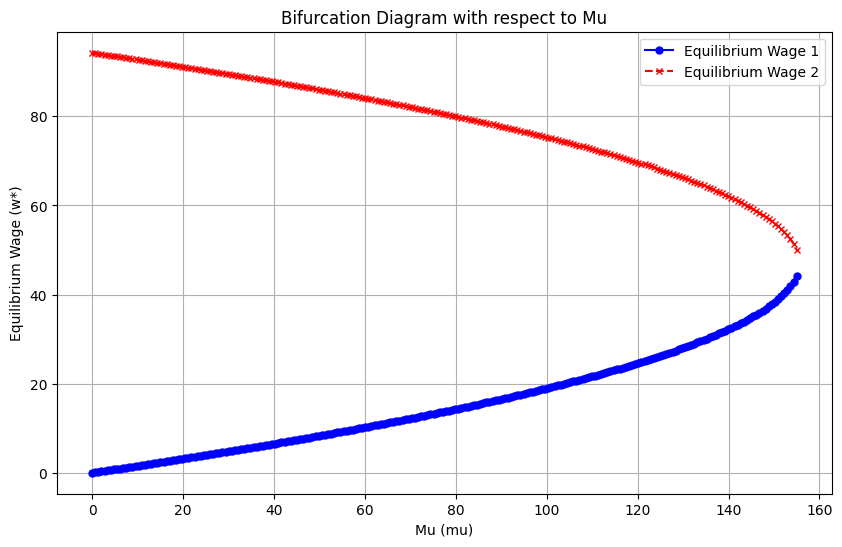

In [45]:
# Define a range of mu values for the bifurcation analysis
mu_values = np.linspace(0, 170, 250)

# Initialize lists to store equilibrium wages
equilibrium_wages_mu_1 = []
equilibrium_wages_mu_2 = []

# Loop through each mu value and solve for equilibrium wages
for mu in mu_values:
    
    equilibrium_wage = solve(beta * (mu - gamma*w-(alpha*w - delta * w**2))) # sympy solve here for specific mu value

    try:
        # Append existing equilibria; use None if equilibrium does not exist
        equilibrium_wages_mu_1.append(float(equilibrium_wage[0]) if len(equilibrium_wage) > 0 else None)
        equilibrium_wages_mu_2.append(float(equilibrium_wage[1]) if len(equilibrium_wage) > 1 else None)
    except TypeError:
        equilibrium_wages_mu_1.append(None)
        equilibrium_wages_mu_2.append(None)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu_values, equilibrium_wages_mu_1, label='Equilibrium Wage 1', marker='o', markersize=5, linestyle='-', color='blue')
plt.plot(mu_values, equilibrium_wages_mu_2, label='Equilibrium Wage 2', marker='x', markersize=5, linestyle='--', color='red')
plt.xlabel('Mu (mu)')
plt.ylabel('Equilibrium Wage (w*)')
plt.title('Bifurcation Diagram with respect to Mu')
plt.legend()
plt.grid(True)
plt.show()
